In [1]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Activation, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import Input
import numpy as np
import tensorflow

In [31]:
mobile = MobileNetV2()

In [3]:
def prepare_img(file):
    img_path = r"C:\Users\j3192\Desktop\Jupyter Notebook\計算機程式\Fruit -Database\Fruit Data _Base\Mango\\"
    img = image.load_img(img_path + file, target_size = (224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis = 0)
    return tensorflow.keras.applications.mobilenet.preprocess_input(img_array_expanded)

In [4]:
preprocessrd_img = prepare_img('Mango001.png')
prediction = mobile.predict(preprocessrd_img)
result = imagenet_utils.decode_predictions(prediction)
result

[[('n07860988', 'dough', 0.36076245),
  ('n03041632', 'cleaver', 0.12708862),
  ('n12267677', 'acorn', 0.077616885),
  ('n07749582', 'lemon', 0.07267166),
  ('n04270147', 'spatula', 0.032392304)]]

In [33]:
mobile.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [7]:
base_model=MobileNetV2(weights='imagenet',include_top=False)

D:\ANACONDA\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [8]:
for layer in base_model.layers:
    layer.trainable = False

In [9]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
_______________________________________________________________________________

In [25]:
for layer in mobile.layers[:-23]:
    layer.trainable = False

In [11]:
train_datagen=image.ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
train_generator=train_datagen.flow_from_directory(r"C:\Users\j3192\Desktop\train",
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                batch_size=10,
                                                class_mode='categorical',
                                                shuffle=True)

Found 540 images belonging to 2 classes.


In [12]:
test_datagen = image.ImageDataGenerator(preprocessing_function = preprocess_input)
test_generator = test_datagen.flow_from_directory(r'C:\Users\j3192\Desktop\test',
                                                 target_size = (224, 224),
                                                 color_mode = 'rgb',
                                                 batch_size = 10,
                                                 class_mode = 'categorical',
                                                 shuffle = True)

Found 200 images belonging to 2 classes.


In [35]:
mobile.layers[-2]

In [37]:
x = mobile.layers[-2].output
# x = GlobalAveragePooling2D()(x)
pre = Dense(2, activation='softmax')(x)
new_model = Model(mobile.input, pre)

In [38]:
new_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [39]:
new_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [40]:
new_model.fit_generator(generator=train_generator, 
                        steps_per_epoch=27,
                        epochs=5,
                        validation_data=test_generator,
                        validation_steps=10
                       )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 27 steps, validate for 10 steps
Epoch 1/5
27/27 [==============================] - 45s 2s/step - loss: 0.2182 - accuracy: 0.9407 - val_loss: 4.8484 - val_accuracy: 0.8000
Epoch 2/5
27/27 [==============================] - 34s 1s/step - loss: 0.2967 - accuracy: 0.9630 - val_loss: 1.1887 - val_accuracy: 0.8300
Epoch 3/5
27/27 [==============================] - 34s 1s/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 10.9822 - val_accuracy: 0.5000
Epoch 4/5
27/27 [==============================] - 35s 1s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 8.7189 - val_accuracy: 0.5000
Epoch 5/5
27/27 [==============================] - 34s 1s/step - loss: 3.9779e-04 - accuracy: 1.0000 - val_loss: 6.4071 - val_accuracy: 0.5600


In [41]:
tensorflow.keras.models.save_model(new_model, 'mobile_test1')

INFO:tensorflow:Assets written to: mobile_test1\assets


In [43]:

# converter = tensorflow.lite.TFLiteConverter.from_saved_model('mobile_test1')
# tflite_model = converter.convert()
open('mobile_test1.tflite', 'wb').write(tflite_model)

8866628

In [114]:
prediction = new_model.predict(test_generator[0][0])
prediction

array([[0.06963411, 0.9303659 ],
       [0.73194885, 0.26805115],
       [0.1457015 , 0.85429853],
       [0.1290598 , 0.87094015],
       [0.7187419 , 0.28125805],
       [0.9650603 , 0.03493967],
       [0.9976406 , 0.00235936],
       [0.98342854, 0.0165715 ],
       [0.11710815, 0.8828919 ],
       [0.05890399, 0.941096  ]], dtype=float32)

In [107]:
test_generator[0][0][0].shape

(224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


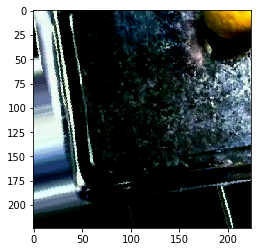

In [125]:
import matplotlib.pyplot as plt
plt.imshow(test_generator[0][0][8])

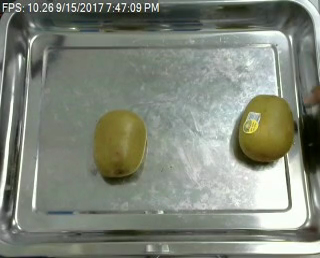

In [84]:
from IPython.display import Image
Image(filename=r"C:\Users\j3192\Desktop\test\kiwi A\Kiwi A00271.png")

In [79]:
test_generator[0]

(array([[[[-0.8117647 , -0.7882353 , -0.8509804 ],
          [-0.78039217, -0.7490196 , -0.8117647 ],
          [-0.7254902 , -0.69411767, -0.7411765 ],
          ...,
          [-0.5764706 , -0.4823529 , -0.5294118 ],
          [-0.5764706 , -0.4823529 , -0.5294118 ],
          [-0.54509807, -0.4588235 , -0.5058824 ]],
 
         [[-0.8039216 , -0.7647059 , -0.85882354],
          [-0.7647059 , -0.7411765 , -0.8039216 ],
          [-0.7254902 , -0.69411767, -0.7411765 ],
          ...,
          [-0.5764706 , -0.4823529 , -0.5294118 ],
          [-0.5686275 , -0.47450978, -0.52156866],
          [-0.54509807, -0.4588235 , -0.5058824 ]],
 
         [[-0.79607844, -0.7647059 , -0.827451  ],
          [-0.7647059 , -0.7411765 , -0.8039216 ],
          [-0.70980394, -0.6862745 , -0.73333335],
          ...,
          [-0.5764706 , -0.4823529 , -0.5294118 ],
          [-0.5686275 , -0.47450978, -0.52156866],
          [-0.52156866, -0.42745095, -0.47450978]],
 
         ...,
 
         [[-

In [32]:
x_input = Input(shape=(224, 224, 3))
x = base_model(x_input)
x = GlobalAveragePooling2D()(x)
x = Dense(100, activation='relu')(x)
x = Dense(50, activation='relu')(x)
x = Dense(25, activation='relu')(x)
pred = Dense(1000, activation='softmax')(x)

In [35]:
new_model = Model(x_input, pred)

In [36]:
new_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Model) multiple                  2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               128100    
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              2600

In [38]:
new_model.fit_generator(generator=train_generator,
                        epochs=10)

  ...
    to  
  ['...']
Train for 9 steps
Epoch 1/10
9/9 [==============================] - 15s 2s/step - loss: 7049.9776 - accuracy: 0.0000e+00
Epoch 2/10
9/9 [==============================] - 10s 1s/step - loss: 9157.8747 - accuracy: 0.0000e+00
Epoch 3/10
9/9 [==============================] - 12s 1s/step - loss: 17600.9361 - accuracy: 0.0000e+00
Epoch 4/10
9/9 [==============================] - 12s 1s/step - loss: 34274.5423 - accuracy: 0.0000e+00
Epoch 5/10
9/9 [==============================] - 10s 1s/step - loss: 61520.3247 - accuracy: 0.0000e+00
Epoch 6/10
9/9 [==============================] - 10s 1s/step - loss: 108075.2291 - accuracy: 0.0000e+00
Epoch 7/10
9/9 [==============================] - 10s 1s/step - loss: 178370.2927 - accuracy: 0.0000e+00
Epoch 8/10
9/9 [==============================] - 10s 1s/step - loss: 283360.8111 - accuracy: 0.0000e+00
Epoch 9/10
9/9 [==============================] - 12s 1s/step - loss: 434050.0444 - accuracy: 0.0000e+00
Epoch 10/10
9/9 [==

In [31]:
preprocessrd_img = prepare_img('Mango001.png')
prediction = new_model.predict(preprocessrd_img)
result = imagenet_utils.decode_predictions(prediction)
result

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3195677e-12,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.0145044e-04,
        9.9979860e-01, 5.1003770e-09]], dtype=float32)

In [2]:
!pip install google_images_download
from google_images_download import google_images_download
response = google_images_download.googleimagesdownload()
arguments = {"keywords":"blue tit","limit":100,"print_urls":False,"format":"jpg", "size":">400*300"}
paths = response.download(arguments)
arguments = {"keywords":"crow","limit":100,"print_urls":False, "format":"jpg", "size":">400*300"}
paths = response.download(arguments)


  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14554 sha256=f7cec88a83055c91e8963f04f254b2f6eee7161ae237f2cd18e187753bd2a18e
  Stored in directory: C:\Users\j3192\AppData\Local\pip\Cache\wheels\1f\28\ad\f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download

Item no.: 1 --> Item name = blue tit
Evaluating...
Starting Download...


Unfortunately all 100 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0


Item no.: 1 --> Item name = crow
Evaluating...
Starting Download...


Unfortunately all 100 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0

